## Data_Pre-processing_and_Processing

In [3]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [4]:
train_labels = []
train_samples = []

Example data: 

<ul> 
<li>An experimental drug was tested on individuas from ages 13 to 65.</li>
<li>The trial had 2100 participants. Half were usder 65 years old, half were over 65 years old.</li>
<li>95% of patientes 65 or older experienced side effects.</li>
<li>95% of patients under 65 experienced no side effects.</li>

In [5]:
for i in range(1000):
  random_younger = randint(13, 64)
  train_samples.append(random_younger)
  train_labels.append(0)

  random_older = randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(1)

for i in range(50):
  random_younger = randint(13, 64)
  train_samples.append(random_younger)
  train_labels.append(1)

  random_older = randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(0)

In [8]:
# print raw data
for i in train_samples:
  print(i)

In [9]:
for i in train_labels:
  print(i)

In [10]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [13]:
#print scaled data
for i in scaled_train_samples:
    print(i)

## Simple tf.keras Sequential Model

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [16]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [17]:
model = Sequential([
    Dense(units=16, input_shape=(1, ), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.2556 - accuracy: 0.9429 - val_loss: 0.2417 - val_accuracy: 0.9476
Epoch 2/30
189/189 - 1s - loss: 0.2551 - accuracy: 0.9376 - val_loss: 0.2413 - val_accuracy: 0.9476
Epoch 3/30
189/189 - 1s - loss: 0.2548 - accuracy: 0.9418 - val_loss: 0.2411 - val_accuracy: 0.9476
Epoch 4/30
189/189 - 1s - loss: 0.2542 - accuracy: 0.9450 - val_loss: 0.2395 - val_accuracy: 0.9476
Epoch 5/30
189/189 - 1s - loss: 0.2540 - accuracy: 0.9407 - val_loss: 0.2395 - val_accuracy: 0.9476
Epoch 6/30
189/189 - 1s - loss: 0.2536 - accuracy: 0.9423 - val_loss: 0.2391 - val_accuracy: 0.9476
Epoch 7/30
189/189 - 1s - loss: 0.2533 - accuracy: 0.9402 - val_loss: 0.2388 - val_accuracy: 0.9476
Epoch 8/30
189/189 - 1s - loss: 0.2529 - accuracy: 0.9460 - val_loss: 0.2379 - val_accuracy: 0.9476
Epoch 9/30
189/189 - 1s - loss: 0.2526 - accuracy: 0.9402 - val_loss: 0.2372 - val_accuracy: 0.9476
Epoch 10/30
189/189 - 1s - loss: 0.2523 - accuracy: 0.9444 - val_loss: 0.2365 - val_accuracy: 0.9476

## Preprocessing Test Data

In [25]:
test_labels = []
test_samples = []

In [27]:
for i in range(10):
    # The 5% younger individuals who did experience side effects
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # the 5% of older individuals who did not experience side effects
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(200):
    # the 95% of younger individuals who did not experience side effects
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # the 95% of older individuals who did experience side effects
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)

In [29]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_samples, test_samples)

In [30]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1, 1))

## Predict

In [31]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [41]:
for i in predictions:   # [not experiencing, experiencing]
    print(i)

In [39]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [42]:
for i in rounded_predictions:
    print(i)

## Confusion Matrix

Using a confusion matrix we can visually observe how well a model predicts on test data.

In [43]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

We create a confusion matrix by calling a function confusion matrix from sklearn.

In [44]:
cm = confusion_matrix(y_true= test_labels, y_pred=rounded_predictions)

In [45]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 3  0  0 ...  0  0  0]
 ...
 [ 0 12  0 ...  0  0  0]
 [ 0  2  0 ...  0  0  0]
 [ 0  7  0 ...  0  0  0]]


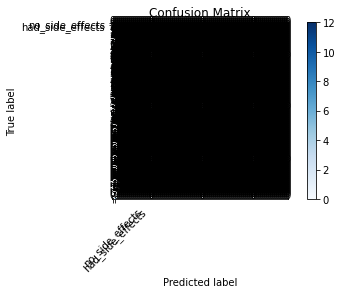

In [48]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## Save and Load a Model

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### 1. model.save()

In [53]:
#cheks first to see if file exists already.
# if not, the model is saved to disk.
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

This save function saves

<ul>
    <li>The architecture of the model, allowing to re-create the model.</li>
    <li>The weight of the model</li>
    <li>The training configuration (loss, optimizer).</li>
    <li>The state of the optimizer, allowing to resume training exactly where you left off.</li>

In [54]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [58]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [60]:
new_model.get_weights()

[array([[-0.42241406, -0.38203967, -0.02721258, -0.54164356,  0.6102464 ,
          0.40460378, -0.23476765, -0.07084125, -0.56571007, -0.16572338,
         -0.18442109, -0.56693935,  0.40097535,  0.48042542,  0.75630647,
          0.12848113]], dtype=float32),
 array([ 0.        ,  0.        ,  0.28391182,  0.        , -0.18215708,
        -0.16334262,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.14447428, -0.1541767 , -0.17822003,
         0.2311643 ], dtype=float32),
 array([[-2.75583327e-01,  2.17083126e-01, -2.03240871e-01,
          2.00031191e-01, -3.50714207e-01,  2.69574434e-01,
          2.15771884e-01, -7.59751797e-02, -2.78102458e-02,
         -3.51226717e-01,  2.82922238e-01, -5.49993515e-02,
          1.26822561e-01, -3.27928692e-01, -3.12163144e-01,
          3.02115530e-01,  3.03506881e-01,  1.16831481e-01,
         -1.62134543e-01, -1.87349737e-01,  1.91782415e-02,
         -1.47039562e-01, -1.08639479e-01, -1.61047906e-01,
 

In [61]:
new_model.optimizer

### 2. model.to_json()

If we only need to save the architecture of a model, and not its weights or its training configuration, we can use the following function to save the architecture only.

In [63]:
# save as JSON
json_string = model.to_json()

# saving as YAML
# yaml_string = model.to_yaml()

In [64]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [65]:
# model reconstruction from JSON:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

# model reconstruction from YAML
# from tensorflow.keras.models import model_from_yaml
# model = model_from_yaml(yaml_string)

In [67]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## model.save_weights()

If we only need to save the weights of a model, we can use the following function save the weights only.

In [69]:
# checks first to see if file exists already.
# If not, the weights are saved to disk.
import os.path
if os.path.isfile('models/my_models_weights.h5') is False:
    model.save_weights('models/my_model_weights.h5')

In [70]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [71]:
model2.load_weights('models/my_model_weights.h5')

In [72]:
model2.get_weights()

[array([[-0.42241406, -0.38203967, -0.02721258, -0.54164356,  0.6102464 ,
          0.40460378, -0.23476765, -0.07084125, -0.56571007, -0.16572338,
         -0.18442109, -0.56693935,  0.40097535,  0.48042542,  0.75630647,
          0.12848113]], dtype=float32),
 array([ 0.        ,  0.        ,  0.28391182,  0.        , -0.18215708,
        -0.16334262,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.14447428, -0.1541767 , -0.17822003,
         0.2311643 ], dtype=float32),
 array([[-2.75583327e-01,  2.17083126e-01, -2.03240871e-01,
          2.00031191e-01, -3.50714207e-01,  2.69574434e-01,
          2.15771884e-01, -7.59751797e-02, -2.78102458e-02,
         -3.51226717e-01,  2.82922238e-01, -5.49993515e-02,
          1.26822561e-01, -3.27928692e-01, -3.12163144e-01,
          3.02115530e-01,  3.03506881e-01,  1.16831481e-01,
         -1.62134543e-01, -1.87349737e-01,  1.91782415e-02,
         -1.47039562e-01, -1.08639479e-01, -1.61047906e-01,
 